<a href="https://colab.research.google.com/github/YounSooKimTech/Coding_Test_202312/blob/main/Analysis_and_Reporting_JoyKim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Merging

In [ ]:
import pandas as pd

df_base = pd.read_csv('https://raw.githubusercontent.com/YounSooKimTech/Coding_Test_202312/main/Data/baseline_survey.csv')
df_random = pd.read_csv('https://raw.githubusercontent.com/YounSooKimTech/Coding_Test_202312/main/Data/random_survey.csv')
df_after = pd.read_csv('https://raw.githubusercontent.com/YounSooKimTech/Coding_Test_202312/main/Data/endline_survey.csv')

print(df_base.info(), '\n')
print(df_random.info(), '\n')
print(df_after.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       5000 non-null   int64 
 1   Age                      5000 non-null   int64 
 2   Sex                      5000 non-null   object
 3   Ethnicity                5000 non-null   object
 4   University_Degree        5000 non-null   object
 5   Flu_Vaccination_History  5000 non-null   object
 6   Living_Area              5000 non-null   object
 7   Before_Perception        5000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 312.6+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      5000 non-null   int64 
 1   Group   5000 non-null   object
dtypes: int64(1), object(1)
memory usage: 78.2+ KB
None

In [ ]:
temp = df_base.merge(df_random, on="ID")
df_total = df_after.merge(temp, on="ID", how="inner").sort_values(by="ID", ascending=True)

print(df_total.info(), '\n')

df_total.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 676 to 734
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       4500 non-null   int64 
 1   After_Perception         4500 non-null   int64 
 2   Vaccinated               4500 non-null   int64 
 3   Age                      4500 non-null   int64 
 4   Sex                      4500 non-null   object
 5   Ethnicity                4500 non-null   object
 6   University_Degree        4500 non-null   object
 7   Flu_Vaccination_History  4500 non-null   object
 8   Living_Area              4500 non-null   object
 9   Before_Perception        4500 non-null   int64 
 10  Group                    4500 non-null   object
dtypes: int64(5), object(6)
memory usage: 421.9+ KB
None 



,ID,After_Perception,Vaccinated,Age,Sex,Ethnicity,University_Degree,Flu_Vaccination_History,Living_Area,Before_Perception,Group
676,1,3,0,63,Female,White,No,Yes,Urban,3,Emotion
3915,2,5,0,20,Male,White,No,No,Urban,2,Reason
1050,5,2,1,56,Male,Latino,Yes,Yes,Urban,5,Control


In [ ]:
# Dummy Coding

# Dummy code the variable into 0 (no) or 1 (yes)
# To decrease the number of variables, ethnicity is coded as White(1) vs. Non-white(0)
# Living area is coded as 0, rurla, or 1, urban

df_total["D_Sex"] = df_total["Sex"].map({"Male":0, "Female":1})
df_total["D_Flu_Vaccination_History"] = df_total["Flu_Vaccination_History"].map({"No":0, "Yes":1})
df_total["D_Living_Area"] = df_total["Living_Area"].map({"Rural":0, "Urban":1})
df_total["D_University_Degree"] = df_total["University_Degree"].map({"No":0, "Yes":1})
df_total['D_White'] = df_total['Ethnicity'].apply(lambda x: 1 if x == 'White' else 0)

df_total.head()

,ID,After_Perception,Vaccinated,Age,Sex,Ethnicity,University_Degree,Flu_Vaccination_History,Living_Area,Before_Perception,Group,D_Sex,D_Flu_Vaccination_History,D_Living_Area,D_University_Degree,D_White
676,1,3,0,63,Female,White,No,Yes,Urban,3,Emotion,1,1,1,0,1
3915,2,5,0,20,Male,White,No,No,Urban,2,Reason,0,0,1,0,1
1050,5,2,1,56,Male,Latino,Yes,Yes,Urban,5,Control,0,1,1,1,0
986,6,3,1,35,Female,Latino,Yes,No,Urban,4,Control,1,0,1,1,0
4156,7,2,0,37,Male,White,Yes,No,Urban,5,Emotion,0,0,1,1,1


# Descriptive Graphs

<ipython-input-11-b552cddd1195>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_matrix = df_total.corr()


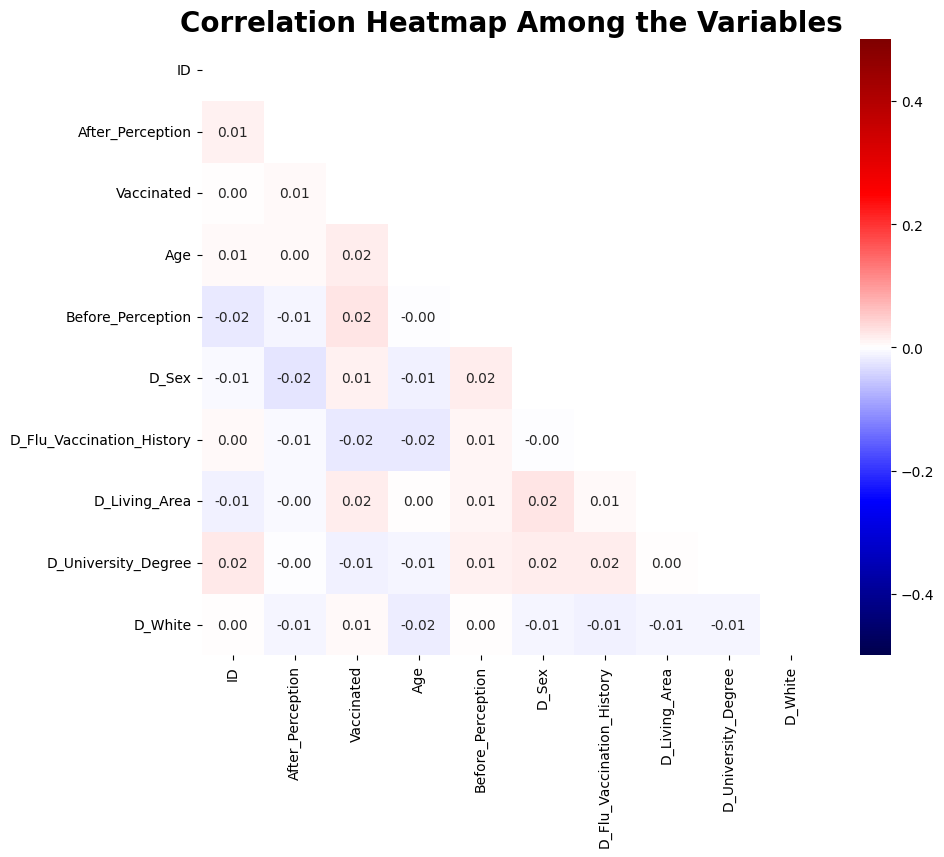

In [ ]:
# Pearson Correlation Heatmap
# Setting the color range from -0.5 to 0.5 to inspect whether the variables are random
# Blue indicates a negative correlation, while red represents a positive correlation
# No specific correlations observed. Variables are randomly assigned for simulation purposes.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_corr_matrix = df_total.corr()
mask = np.triu(np.ones_like(df_corr_matrix))

plt.figure(figsize=(10, 8))

sns.heatmap(df_corr_matrix,
            mask=mask,
            annot=True, fmt=".2f", cmap="seismic",
            vmin=-0.5, vmax=0.5)

plt.title("Correlation Heatmap Among the Variables", fontsize=20, fontweight='bold')

plt.savefig("heatmap_corr_varaibles.png")

plt.xlabel("")
plt.ylabel("")
plt.show()

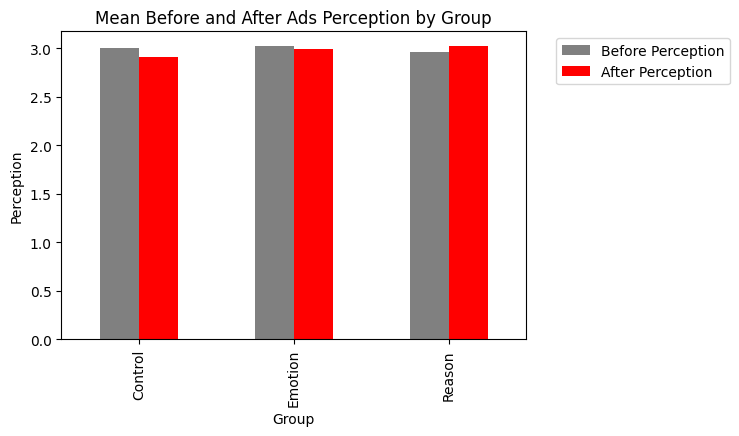

In [ ]:
# Before and After ad exposure in each groups

import matplotlib.pyplot as plt

perception_grouped_means = df_total.groupby('Group')[['Before_Perception', 'After_Perception']].mean()

perception_grouped_means.plot(kind='bar', figsize=(6,4), color=['grey', 'red'])

plt.title('Mean Before and After Ads Perception by Group')
plt.xlabel('Group')
plt.ylabel('Perception')
plt.legend(['Before Perception', 'After Perception'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


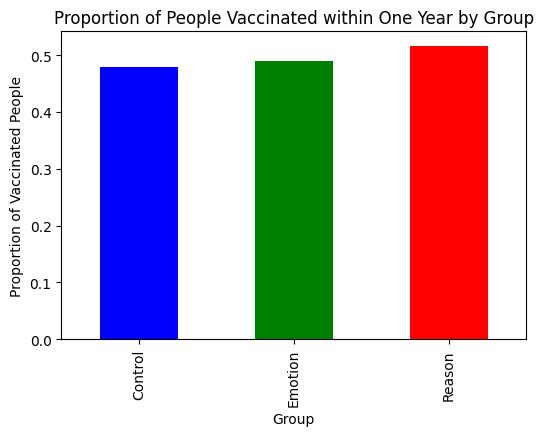

In [ ]:
# Vaccinated within one year

import matplotlib.pyplot as plt

behavior_grouped_means = df_total.groupby('Group')['Vaccinated'].mean()

behavior_grouped_means.plot(kind='bar', figsize=(6,4), color=["blue", "green", "red"])

plt.title('Proportion of People Vaccinated within One Year by Group')
plt.xlabel('Group')
plt.ylabel('Proportion of Vaccinated People')

plt.show()

# Analysis

## Simple ANOVA for Perception Difference

In [ ]:
df_total["Diff_Perception"] = df_total["After_Perception"] - df_total["Before_Perception"]
df_total.head()

,ID,After_Perception,Vaccinated,Age,Sex,Ethnicity,University_Degree,Flu_Vaccination_History,Living_Area,Before_Perception,Group,D_Sex,D_Flu_Vaccination_History,D_Living_Area,D_University_Degree,D_White,Diff_Perception
676,1,3,0,63,Female,White,No,Yes,Urban,3,Emotion,1,1,1,0,1,0
3915,2,5,0,20,Male,White,No,No,Urban,2,Reason,0,0,1,0,1,3
1050,5,2,1,56,Male,Latino,Yes,Yes,Urban,5,Control,0,1,1,1,0,-3
986,6,3,1,35,Female,Latino,Yes,No,Urban,4,Control,1,0,1,1,0,-1
4156,7,2,0,37,Male,White,Yes,No,Urban,5,Emotion,0,0,1,1,1,-3


In [ ]:
# ANOVA and TukeyHSD result

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA
model = ols('Diff_Perception ~ C(Group)', data=df_total).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df_total['Diff_Perception'], df_total['Group'])
print(tukey_results)
print("\n")

# Print the p-values
print(f"Tukey's HSD P-Values: {[round(p, 5) for p in tukey_results.pvalues]}")

                sum_sq      df        F    PR(>F)
C(Group)     19.255263     2.0  2.41556  0.089433
Residual  17923.566737  4497.0      NaN       NaN



 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
Control Emotion   0.0693 0.6054 -0.1008 0.2394  False
Control  Reason   0.1602 0.0725 -0.0111 0.3316  False
Emotion  Reason   0.0909 0.4271 -0.0804 0.2623  False
-----------------------------------------------------


Tukey's HSD P-Values: [0.6054, 0.07253, 0.42712]


## Logistic Regression for Actual Behavior

In [ ]:
df_total.columns

Index(['ID', 'After_Perception', 'Vaccinated', 'Age', 'Sex', 'Ethnicity',
       'University_Degree', 'Flu_Vaccination_History', 'Living_Area',
       'Before_Perception', 'Group', 'D_Sex', 'D_Flu_Vaccination_History',
       'D_Living_Area', 'D_University_Degree', 'D_White', 'Diff_Perception'],
      dtype='object')

In [ ]:
# Due to the binary nature of the actual behavior variable (0 or 1), I used logistic regression.
# In summary, the results suggest that individuals in the "Reason" group have a statistically significant and positive association with the outcome(vaccinated) compared to the control group.
# e^0.15 = 1.16
# "Reason" group is associated with a 16% increase in the odds of getting vaccinated compared to being in the control group.


import statsmodels.api as sm

formula = 'Vaccinated	~ Group + Age + D_Sex + D_White + D_Flu_Vaccination_History + D_Living_Area + D_University_Degree + Before_Perception'
model = sm.Logit.from_formula(formula, data=df_total).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.691543
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             Vaccinated   No. Observations:                 4500
Model:                          Logit   Df Residuals:                     4490
Method:                           MLE   Df Model:                            9
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                0.002225
Time:                        03:16:10   Log-Likelihood:                -3111.9
converged:                       True   LL-Null:                       -3118.9
Covariance Type:            nonrobust   LLR p-value:                    0.1267
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.3326      0.149     -2.231      0.026      -0.